<a href="https://colab.research.google.com/github/pripalazzo/Iniciacao_Machine_Learning/blob/main/IGTI_Bootcamp_ML_Desafio_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importando o dataset 'Banknote Authentication'

df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt', 
                 header = None, 
                 names = ['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [6]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
# Questão 1: Qual o tamanho desse dataset (número de linhas, número de colunas)? 
df.shape

(1372, 5)

In [9]:
# Questão 2: Qual variável possui o maior range (diferença entre valor máximo e mínimo)? 
# Questão 3: Qual a média da coluna skewness? 
# Questão 4: Qual a médida da coluna entropy?
# Questão 5: Qual a mediana da coluna variance?
# Questão 6: Qual o desvio padrão da coluna curtosis?

df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [10]:
dif_variance = df['variance'].max() - df['variance'].min()
dif_skewness = df['skewness'].max() - df['skewness'].min()
dif_curtosis = df['curtosis'].max() - df['curtosis'].min()
dif_entropy = df['entropy'].max() - df['entropy'].min()

print('O range da variável variance é de {}.'.format(dif_variance))
print('O range da variável skewness é de {}.'.format(dif_skewness))
print('O range da variável curtosis é de {}.'.format(dif_curtosis))
print('O o range da variável entropy é de {}.'.format(dif_entropy))


O range da variável variance é de 13.8669.
O range da variável skewness é de 26.7247.
O range da variável curtosis é de 23.2135.
O o range da variável entropy é de 10.9977.


In [11]:
# Questão 7: Qual a porcentagem de exemplos do dataset que são cédulas falsas (class = 1)?

# Filtra as linhas que foram classificadas como falsas
count_false = df[(df['class'] == 1)].count()['class']

# Calcula o percentual
percent_false = (count_false * 100) / len(df.index)

print('A percentagem de exemplos de cédulas falsas é de {:.2f}.'.format(percent_false))



A percentagem de exemplos de cédulas falsas é de 44.46.


In [12]:
# Questão 8: Qual o valor da correlação de Pearson entre as variáveis skewness e curtosis? 
corr = df['skewness'].corr(df['curtosis'])
print(corr)


-0.7868952243065794


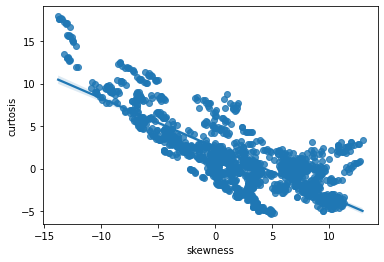

In [13]:
# Realiza o plot da correlação
sns.regplot(x = df['skewness'], y = df['curtosis']);

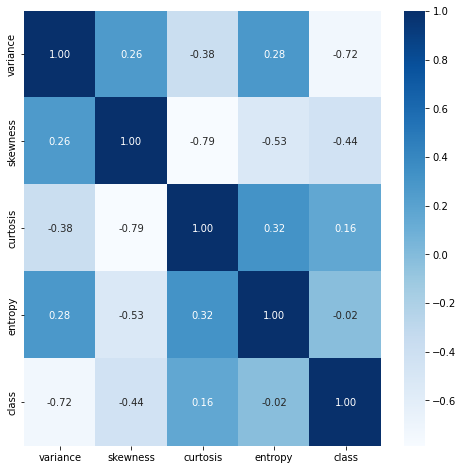

In [14]:
# Plotando um heatmap para avaliar a correlação entre as variáveis

# Calcula a correlação entre as colunas do dataframe
corr_df = df.corr()

plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f') 


In [15]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [16]:
# Preparando os dados para aplicação dos algoritmos

features = df[['variance', 'skewness', 'curtosis', 'entropy']]
target = df['class']

# Indicando os dados de entrada e os target
X = features  # dados de entrada
y = target  # target  

# função que realiza a divisão do dataset
from sklearn.model_selection import train_test_split  

# divide 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

In [17]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#treina o modelo 
clf_KNN = KNeighborsClassifier(n_neighbors = 5) #utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier()

In [18]:
#realiza a previsão
y_pred = clf_KNN.predict(X_test)

In [19]:
# Questão 9: Qual a acurácia do KNN no conjunto de teste?

knn_accuracy = accuracy_score(y_test, y_pred)
print(knn_accuracy)

0.9975728155339806


In [20]:
# Árvore de decisão (Decision Tree Classifier)

from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão

# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier(random_state=1)

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_arvore.predict(X_test)

In [21]:
# Questão 10: Qual a acurácia da Árvore de Decisão no conjunto de teste? 

clf_accuracy = accuracy_score(y_test, y_pred)
print(clf_accuracy)

0.9878640776699029


In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier # importa o classificador árvore de decisão

# Cria o objeto de classificação através do 
clf_floresta = RandomForestClassifier(max_depth = 8, random_state = 1)

# Realiza o treinamento do classificador
clf_floresta = clf_floresta.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_floresta.predict(X_test)

In [23]:
# Questão 11: Qual a acurácia do Random Forest no conjunyo de teste?

rfc_accuracy = accuracy_score(y_test, y_pred)
print(rfc_accuracy)

0.9951456310679612


In [24]:
# Questão 12: Analisando o valor da importância relativa das features do Random Forest (atributo feature_importances_), 
# qual feature melhor contribuiu para a predição de class? 
features_name = features.columns

# Indice de features
print(features_name)

# Valores de features importance
clf_floresta.feature_importances_

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')


array([0.56066718, 0.24058589, 0.14022782, 0.05851911])

<BarContainer object of 4 artists>

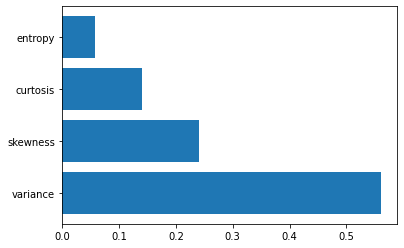

In [25]:
# Plotando o valor de importância das features

plt.barh(features_name, clf_floresta.feature_importances_)

In [26]:
# SVM 
from sklearn.svm import SVC

#cria o objeto SVM
clf_svm = SVC(gamma = 'auto',kernel = 'rbf', random_state = 1)

#realiza a classificação via SVM
clf_svm.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_svm.predict(X_test)

In [27]:
# Questão 14: Qual a acurácia do SVM no conjunyo de teste?

svm_accuracy = accuracy_score(y_test, y_pred)
print(svm_accuracy)

1.0


In [28]:
# MLP
from sklearn.neural_network import MLPClassifier

#define a configuração da rede

clf_mlp = MLPClassifier(hidden_layer_sizes = (2, ), solver = 'lbfgs', random_state=1) 

#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)

#realiza a previsão
y_pred = clf_mlp.predict(X_test)

In [29]:
# Questão 15: Qual a acurácia do MLP no conjunyo de teste?

mlp_accuracy = accuracy_score(y_test, y_pred)
print(mlp_accuracy)

1.0
